# payam_saemi
### Adaline implementation

#### Importing libs

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd

# generating data
#### The first category: 
contains 100 data, whose x variable has a mean of 0 and a standard deviation of 0.1, and its y variable as well.
It has a mean of 0 and a standard deviation of 0.4. 

#### The second category:
contains 100 data, whose x variable has a mean of 1 and a standard deviation of 0.2, and its y variable as well.
It has a mean of 1 and a standard deviation of 0.2.

In [2]:
xdata_mean_A , xdata_sigma_A , n = 0 , 0.1 , 100
ydata_mean_A , ydata_sigma_A = 0 , 0.4
xdata_mean_B , xdata_sigma_B = 1 , 0.2
ydata_mean_B , ydata_sigma_B = 1 , 0.2

# class A :
Xdata_A = np.random.normal(xdata_mean_A , xdata_sigma_A , n)
Ydata_A = np.random.normal(ydata_mean_A , xdata_sigma_A , n)
# Class B :
Xdata_B = np.random.normal(xdata_mean_B , xdata_sigma_B , n)
Ydata_B = np.random.normal(ydata_mean_B , ydata_sigma_B , n)


## Concating
concating data to generate final data_set

In [3]:
## ClassA_matrix
Xdata_A_matrix = np.matrix([Xdata_A])
Ydata_A_matrix = np.matrix([Ydata_A])
ClassA_matrix = np.concatenate((Xdata_A_matrix, Ydata_A_matrix), axis=0)
LabelA = -np.ones(n)
LabelA = np.matrix([LabelA])
ClassA_matrix = np.concatenate((ClassA_matrix, LabelA), axis=0)
ClassA_matrix = ClassA_matrix.transpose()


## ClassB_matrix
Xdata_B_matrix = np.matrix([Xdata_B])
Ydata_B_matrix = np.matrix([Ydata_B])
ClassB_matrix = np.concatenate((Xdata_B_matrix, Ydata_B_matrix), axis=0)
LabelB = np.ones(n)
LabelB = np.matrix([LabelB])
ClassB_matrix = np.concatenate((ClassB_matrix, LabelB), axis=0)
ClassB_matrix = ClassB_matrix.transpose()


final_data = np.concatenate((ClassA_matrix , ClassB_matrix) , axis=0)
np.random.shuffle(final_data)


X = final_data[:,:2]
target = final_data[:,2]

### Display categories of data

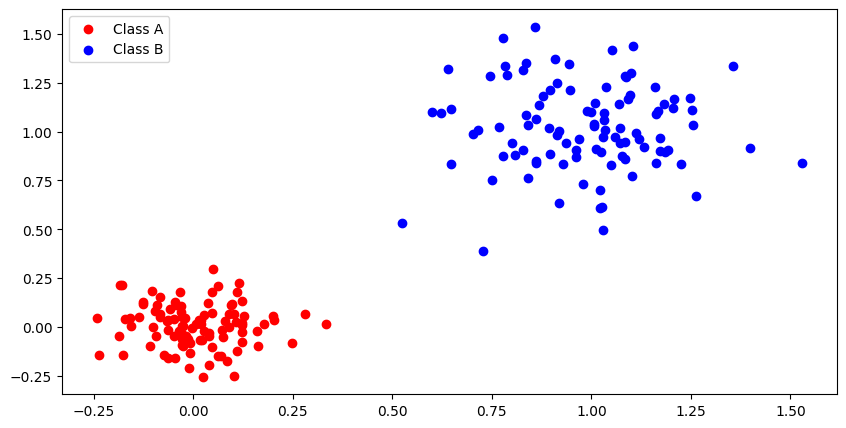

In [4]:
plt.figure(figsize=(10,5))
plt.scatter(Xdata_A , Ydata_A , color="red")
plt.scatter(Xdata_B , Ydata_B , color="blue")
plt.legend(['Class A' , "Class B"] , loc='upper left')

### Adaline implementation

In [ ]:
class Adaline:
  def __init__(self , learning_rate  , n_iter ):
   self.learning_rate = learning_rate
   self.n_iter = n_iter
    
  def predict(self , X ):
   self.net = np.dot(X , self.weights) + self.bias
   return np.where( self.net >= 0 , 1 , -1)
    
  def net_(self , X):
    self.net = np.dot(X , self.weights) + self.bias
  
  def updating_bias(self , target):
    self.bias += self.learning_rate*(target - self.net)    

  def fit(self , X , target):
    self.net = 0
    self.weights = np.random.randn(X.shape[1])
    self.bias = 0
    self.mse_list = []
    
    for pair in range (self.n_iter):
      self.error = []
      for row in range (X.shape[0]):
        self.net_(X[row])
        self.error.append(0.5*(target[row] - self.net)**2)
        self.updating_weights(target[row] , X[row])
        self.updating_bias(target[row])
      self.mse_list.append(sum(self.error) / len(self.error))
    return self